In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scapy.all import sniff,IP
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report 
import joblib # Save the model 
import random
import os
import tensorflow as tf
from tensorflow import keras


The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features)

In [3]:
#Here whatever features that we are considered are only for 5th sem project point of view and please change accordingly before adding to resume
# If need arises change the dataset itself but the steps remain same 

In [4]:
#Done
df = pd.read_csv('Train_data.csv')
#top_features=['src_bytes', 'protocol_type', 'dst_host_srv_count', 'dst_bytes', 'hot', 'service', 'dst_host_diff_srv_rate', 'duration', 'flag', 'dst_host_count', 'dst_host_same_src_port_rate', 'logged_in', 'dst_host_rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'srv_count', 'count','class']
#df_reduced = df1[top_features] 
print("Original DataFrame shape",df.shape)
print(df.head())

Original DataFrame shape (25192, 42)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2               

In [5]:
#Done

print(df.isnull().sum())
print(df.dtypes)
print(df.describe())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
#Done
le = LabelEncoder() 
for column in ['protocol_type', 'service', 'flag']: 
    df[column] = le.fit_transform(df[column])

In [ ]:
#Done
#scaler = StandardScaler() 
#numerical_features = [ 'count','duration', 'src_bytes', 'dst_bytes','hot','srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate' ]
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

C:\Users\vijay\AppData\Local\Temp\ipykernel_11748\166478101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [7]:
#Done
X = df.drop('class', axis=1) 
feature_names = X.columns.tolist()
y = df['class'].map({'normal': 0, 'anomaly': 1})

In [8]:
#Done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Done
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_train.head()
print(len(X_train),len(y_train))

17634 17634


In [10]:
#Done
modeldt = DecisionTreeClassifier() 
modeldt.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
#QLearning
import numpy as np

# Define States and Actions
states = ['normal', 'attack']
actions = ['allow', 'log', 'block']

# Initialize Q-table with zeros
q_table = np.zeros((len(states), len(actions)))

# Define rewards and penalties
rewards = {
    ("attack", "block"): +10,   # ✅ Good: Blocking an actual attack
    ("attack", "log"): -5,      # ⚠️ Okay: Logging instead of blocking
    ("attack", "allow"): -10,   # ❌ Bad: Allowing an attack

    ("normal", "allow"): +5,    # ✅ Good: Allowing normal traffic
    ("normal", "log"): 0,       # Neutral: Logging normal traffic
    ("normal", "block"): -5,    # ❌ Bad: Blocking normal traffic (False positive)
}


In [9]:
#Q Learning
import random

# Learning rate and discount factor
alpha = 0.1   # Learning rate
gamma = 0.9   # Discount factor
epsilon = 0.1 # Exploration rate (for trying new actions)

def q_learning_decision(state):
    """Choose action using an ε-greedy policy"""
    state_index = states.index(state)

    if random.uniform(0, 1) < epsilon:
        # Explore: Random action
        action_index = random.randint(0, len(actions) - 1)
    else:
        # Exploit: Choose the best action based on Q-values
        action_index = np.argmax(q_table[state_index])

    return actions[action_index]

def update_q_table(state, action, reward, next_state):
    """Update the Q-table using the Bellman Equation"""
    state_index = states.index(state)
    action_index = actions.index(action)
    next_state_index = states.index(next_state)

    # Q-learning formula
    q_table[state_index, action_index] = q_table[state_index, action_index] + alpha * (
        reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action_index]
    )


In [10]:
#QLearning
def extract_features(packet):
    """
    Extracts relevant features from a network packet.
    Converts it into a feature vector for the ML model.
    """
    if not packet.haslayer(IP):  # Ensure packet has an IP layer
        return np.zeros(len(feature_names))  # Return a zero-vector if no IP layer

    # Extract features (Modify based on your ML model's training data)
    src_bytes = len(packet[IP])  # Packet size
    dst_bytes = len(packet[IP].payload)
    protocol_type = packet[IP].proto  # Protocol (TCP=6, UDP=17, etc.)
    
    # Add more features as needed
    features = [
        src_bytes, dst_bytes, protocol_type
    ]

    # Ensure the feature vector matches ML model's input shape
    while len(features) < len(feature_names):
        features.append(0)  # Pad with zeros if necessary

    return np.array(features).reshape(1, -1)  # Return as numpy array


In [ ]:

#Real time Analysis
def intrusion_response(packet):
    if not packet.haslayer(IP):  # Ensure packet has an IP layer
        return

    src_ip = packet[IP].src  # Get source IP

    # Step 1: Extract features from the packet
    features = extract_features(packet)
    features_scaled = scaler.transform(features)

    # Convert to DataFrame to match ML model's input format
    features_df = pd.DataFrame(features_scaled, columns=feature_names)

    # Step 2: Predict if the packet is an attack - flatten() ->VVIP
    prediction = modeldt.predict(features_df).flatten()[0]  # ML Model predicts attack or not

    # Step 3: Define state based on ML prediction
    state = 'normal' if prediction == 0 else 'attack'  
    action = q_learning_decision(state)  # RL selects best action

    # Step 4: Take action (Block, Log, Allow)
    if action == "block":
        print(f"🚨 Blocking IP: {src_ip}")
        os.system(f"iptables -A INPUT -s {src_ip} -j DROP")  # Block attacker IP

    elif action == "log":
        print(f"📝 Logging IP: {src_ip}")

    else:
        print(f"✅ Allowing IP: {src_ip}")

    # Step 5: Determine reward and update Q-table
    next_state = 'normal' if prediction == 0 else 'attack'  
    reward = rewards.get((state, action), 0)  # Get reward from dictionary
    update_q_table(state, action, reward, next_state)  # Update Q-table

# Start sniffing network packets
sniff(filter="ip", prn=intrusion_response, count=10)


In [ ]:

joblib.dump(modeldt, 'ids_model1.joblib')

['ids_model1.joblib']

Length of feature_names: 41
Length of importances: 41


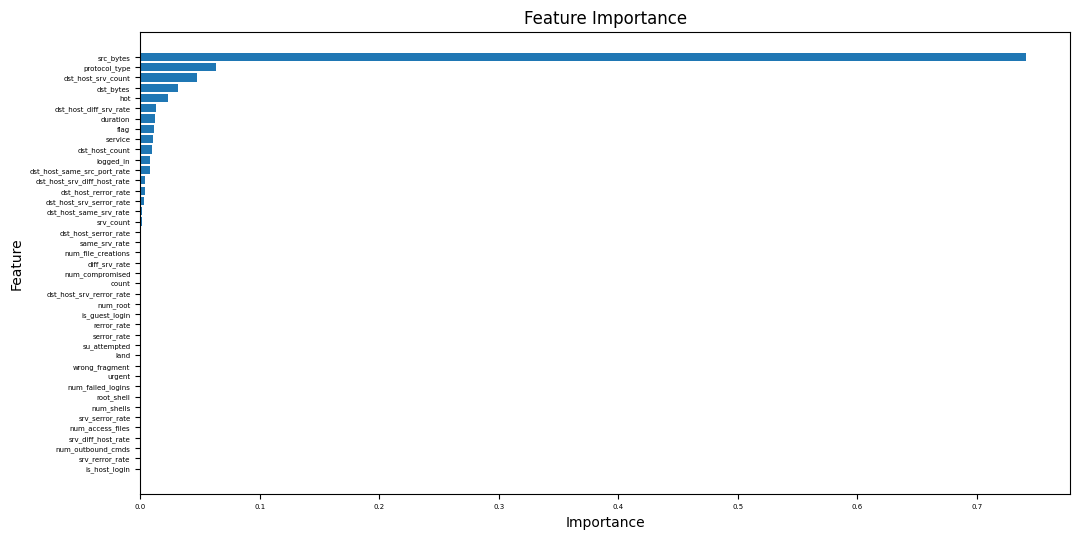

In [11]:
# Get feature importance 
#To remoove the erros use Decision tree classiifer above this cell and then excecute.
#model = joblib.load('ids_model1.joblib')
importances = modeldt.feature_importances_
#  # Create a DataFrame for better visualization 
print("Length of feature_names:", len(feature_names)) 
print("Length of importances:", len(importances)) # Ensure the lengths match
if len(feature_names) == len(importances): 
    # Create a DataFrame for better visualization 
    feature_importance_df = pd.DataFrame({ 'Feature': feature_names, 'Importance': importances }).sort_values(by='Importance', ascending=False)
# Plot feature importance 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance']) 
plt.xlabel('Importance') 
plt.ylabel('Feature')
plt.yticks(fontsize=5) # Increase the y-axis tick font size 
plt.xticks(fontsize=5)
plt.title('Feature Importance') 
plt.gca().invert_yaxis() # Invert y-axis to show the most important feature at the top 
plt.show()

In [13]:
zero_importance_features = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature'].tolist()
print("Features with zero importance:", zero_importance_features)

Features with zero importance: ['serror_rate', 'su_attempted', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'root_shell', 'num_shells', 'srv_serror_rate', 'num_access_files', 'srv_diff_host_rate', 'num_outbound_cmds', 'srv_rerror_rate', 'is_host_login']


In [15]:
top_features = feature_importance_df.head(5)['Feature'].tolist() 
print("Top 5 features:", top_features)

Top 5 features: ['src_bytes', 'protocol_type', 'dst_host_srv_count', 'dst_bytes', 'hot']


Among the above features we have only considered few features as in real time for testing purpose we can capture only those parameters while sniffing the network packets

In [16]:
df_reduced = df[top_features] 
print("DataFrame shape after retaining top 5 features:",df_reduced.shape)

DataFrame shape after retaining top 5 features: (25192, 5)


In [17]:
df1 = pd.read_csv('Train_data.csv')
top_features=['src_bytes', 'protocol_type', 'dst_bytes','service', 'duration', 'flag','class']
df_reduced1 = df1[top_features] 
print("DataFrame shape after retaining features that can be captured using sniffing",df_reduced1.shape)
print(df_reduced1.head())

DataFrame shape after retaining features that can be captured using sniffing (25192, 7)
   src_bytes protocol_type  dst_bytes   service  duration flag    class
0        491           tcp          0  ftp_data         0   SF   normal
1        146           udp          0     other         0   SF   normal
2          0           tcp          0   private         0   S0  anomaly
3        232           tcp       8153      http         0   SF   normal
4        199           tcp        420      http         0   SF   normal


In [18]:
from scapy.all import *
import time

# Dictionary to store timestamps for duration calculation
session_tracker = {}

def extract_features(packet):
    if not packet.haslayer(IP):  # Ensure the packet has an IP layer
        return None

    src_ip = packet[IP].src  # Source IP
    dst_ip = packet[IP].dst  # Destination IP
    protocol = packet[IP].proto  # Protocol (TCP=6, UDP=17, ICMP=1)
    packet_size = len(packet)  # Total packet size
    payload_size = len(packet[IP].payload)  # Payload size

    # TCP-specific details
    if packet.haslayer(TCP):
        tcp_flags = packet[TCP].flags  # TCP Flags (e.g., SYN, ACK, FIN)
        service = packet[TCP].dport  # Destination port (used to infer service)
    elif packet.haslayer(UDP):
        tcp_flags = None  # No flags for UDP
        service = packet[UDP].dport  # Destination port for UDP
    else:
        tcp_flags = None
        service = None  # Non-TCP/UDP packets

    # Tracking duration of the session
    session_key = (src_ip, dst_ip, service)
    if session_key in session_tracker:
        duration = time.time() - session_tracker[session_key]  # Time difference
    else:
        session_tracker[session_key] = time.time()  # Store first seen time
        duration = 0  # First packet has 0 duration

    # Features extracted from the packet
    features = {
        "src_bytes": packet_size,
        "dst_bytes": payload_size,
        "protocol_type": protocol,
        "flag": tcp_flags,
        "service": service,
        "duration": round(duration, 2)  # Duration in seconds
    }

    return features

# Callback function for sniffing packets
def packet_callback(packet):
    features = extract_features(packet)
    if features:
        print(features)  # Print extracted features

# Start sniffing packets (Modify filter as needed)
print("Sniffing network packets... Press Ctrl+C to stop.")
sniff(filter="ip", prn=packet_callback, count=10)


Sniffing network packets... Press Ctrl+C to stop.
{'src_bytes': 55, 'dst_bytes': 21, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 443, 'duration': 0}
{'src_bytes': 55, 'dst_bytes': 21, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 443, 'duration': 0}
{'src_bytes': 54, 'dst_bytes': 20, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 40696, 'duration': 0}
{'src_bytes': 2774, 'dst_bytes': 2740, 'protocol_type': 6, 'flag': <Flag 24 (PA)>, 'service': 443, 'duration': 0}
{'src_bytes': 66, 'dst_bytes': 32, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 40411, 'duration': 0}
{'src_bytes': 54, 'dst_bytes': 20, 'protocol_type': 6, 'flag': <Flag 20 (RA)>, 'service': 40316, 'duration': 0}
{'src_bytes': 66, 'dst_bytes': 32, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 40142, 'duration': 0}
{'src_bytes': 590, 'dst_bytes': 556, 'protocol_type': 6, 'flag': <Flag 16 (A)>, 'service': 443, 'duration': 1.38}
{'src_bytes': 54, 'dst_bytes': 20, 'protocol_type': 6, 'fla

<Sniffed: TCP:10 UDP:0 ICMP:0 Other:0>

In [19]:
df1=df_reduced1
print(df1.isnull().sum())
print(df1.dtypes)
print(df1.describe())

src_bytes        0
protocol_type    0
dst_bytes        0
service          0
duration         0
flag             0
class            0
dtype: int64
src_bytes         int64
protocol_type    object
dst_bytes         int64
service          object
duration          int64
flag             object
class            object
dtype: object
          src_bytes     dst_bytes      duration
count  2.519200e+04  2.519200e+04  25192.000000
mean   2.433063e+04  3.491847e+03    305.054104
std    2.410805e+06  8.883072e+04   2686.555640
min    0.000000e+00  0.000000e+00      0.000000
25%    0.000000e+00  0.000000e+00      0.000000
50%    4.400000e+01  0.000000e+00      0.000000
75%    2.790000e+02  5.302500e+02      0.000000
max    3.817091e+08  5.151385e+06  42862.000000


In [20]:
le = LabelEncoder() 
for column in ['protocol_type', 'service', 'flag']: 
    df1[column] = le.fit_transform(df1[column])

In [21]:
scaler = StandardScaler() 
numerical_features = [ 'duration', 'src_bytes', 'dst_bytes', ]
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])
print(df1.shape)

(25192, 7)


In [22]:
X1 = df1.drop('class', axis=1) 
feature_names1 = X1.columns.tolist()
y1 = df1['class'].map({'normal': 0, 'anomaly': 1})

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
print(len(X_train1),len(X_test1), len(y_train1), len(y_test1))

17634 7558 17634 7558


In [24]:
#The below two lines is used only to avoid error has automatic index adjusting is done only in dataframe and not in numpy array but has no significance in this project
y_train1 = pd.Series(y_train1)
y_test1 = pd.Series(y_test1)


X_train1 = X_train1.dropna()
X_test1=X_test1.dropna()
print(len(X_train1),len(y_train1))

#Resetting the index of the dataframe aswhen dropna() is used the resulting dataframe numberes wont be sequential,so in order to make it sequential we are writung below four lines
X_train1 = X_train1.reset_index(drop=True)
X_test1 = X_test1.reset_index(drop=True)

y_train1 = y_train1.reset_index(drop=True)
y_test1 = y_test1.reset_index(drop=True)

print(len(X_test1),len(y_test1))
y_train1 = y_train1.loc[X_train1.index]
y_test1=y_test1.loc[X_test1.index]
X_train1.head()


17634 17634
7558 7558


,src_bytes,protocol_type,dst_bytes,service,duration,flag
0,-0.010093,1,-0.03931,46,-0.113551,5
1,-0.010093,1,-0.03931,16,-0.113551,2
2,-0.010093,1,-0.03931,3,-0.113551,1
3,-0.010089,0,-0.03931,13,-0.113551,9
4,-0.010093,1,-0.03931,46,-0.113551,5


In [25]:
modeldt1 = DecisionTreeClassifier() 
modeldt1.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [35]:
y_pred1 = modeldt1.predict(X_test1) 
DecisionTreeClassifier1=99.2590632442445
print("Accuracy:", accuracy_score(y_test1, y_pred1)) 
print("Classification Report:\n", classification_report(y_test1, y_pred1))

Accuracy: 0.992590632442445
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4042
           1       0.99      0.99      0.99      3516

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [27]:
modeldk1 = KNeighborsClassifier(n_neighbors=10) 
modeldk1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred1 = modeldk1.predict(X_test1) 
KNeighborsClassifier=98.95474993384493
print("Accuracy:", accuracy_score(y_test1, y_pred1)) 
print("Classification Report:\n", classification_report(y_test1, y_pred1))

Accuracy: 0.9895474993384493
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4042
           1       0.99      0.99      0.99      3516

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [30]:
modelds1 = SVC(kernel='linear') 
modelds1.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = modelds1.predict(X_test1) 
SupportVectorMachine=92.74940460439269
print("Accuracy:", accuracy_score(y_test1, y_pred1)) 
print("Classification Report:\n", classification_report(y_test1, y_pred1))

Accuracy: 0.9274940460439269
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4042
           1       0.92      0.93      0.92      3516

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



In [32]:
modeldn1 = GaussianNB()
modeldn1.fit(X_train1, y_train1)

GaussianNB()

In [ ]:
y_pred1 = modeldn1.predict(X_test1) 
GaussianNB=60.45250066155068
print("Accuracy:", accuracy_score(y_test1, y_pred1)) 
print("Classification Report:\n", classification_report(y_test1, y_pred1))

Accuracy: 0.6045250066155068
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.95      0.72      4042
           1       0.77      0.21      0.33      3516

    accuracy                           0.60      7558
   macro avg       0.68      0.58      0.53      7558
weighted avg       0.67      0.60      0.54      7558



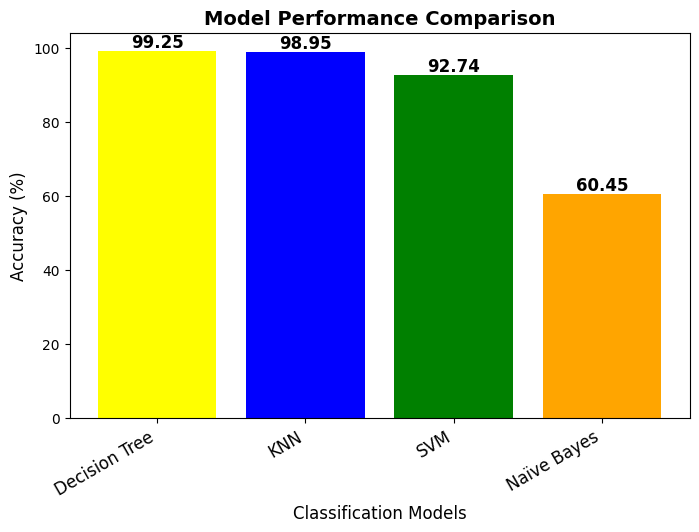

In [38]:
#Plots of different Model for comparing Performance and choosing one among them


# Data
import matplotlib.pyplot as plt

# Data
labels = ['Decision Tree', 'KNN', 'SVM', 'Naïve Bayes']
values = [99.25, 98.95, 92.74, 60.45]
colors = ['yellow', 'blue', 'green', 'orange']  # Different colors for each bar

# Create the bar plot
plt.figure(figsize=(8,5))  # Increased figure size
bars = plt.bar(labels, values, color=colors)

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,  # Position slightly above bar
             f"{bar.get_height():.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)

# Labels and title
plt.xlabel("Classification Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')

plt.show()





Deep Q Learning

In [87]:
# Convert DataFrame to NumPy arrays for RL training
#X_train = X_train.to_numpy()
y_train1 = y_train1.to_numpy()

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)

# Define Deep Q-Network (DQN)
modeldq = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train1.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(2, activation="linear")  # 2 actions: allow, block
])

modeldq.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
#print(type(y_train))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:


gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate (start high for exploration)
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Decay for exploration over episodes
batch_size = 32
memory = []  # Store past experiences

# Training loop
for episode in range(1):  # Number of training episodes
    for i in range(len(X_train_scaled[100])):  # Iterate through training data
        state = X_train_scaled[i]
        true_label = y_train1[i]  # 0 = normal, 1 = attack
        
        # Choose action (Exploration vs Exploitation)
        if np.random.rand() < epsilon:
            action_index = np.random.choice([0, 1])  # Randomly choose between Allow (0) or Block (1)
        else:
            state = np.array(state, dtype=np.float32)
            action_index = np.argmax(modeldt1.predict(state.reshape(1, -1), verbose=0))  # Best action

        # Reward Mechanism
        if action_index == 1 and true_label == 1:  # Correctly blocking attack
            reward = 10
        elif action_index == 0 and true_label == 1:  # Incorrectly allowing an attack
            reward = -10
        elif action_index == 0 and true_label == 0:  # Correctly allowing normal traffic
            reward = 5
        else:  # Incorrectly blocking normal traffic
            reward = -5

        # Store experience in memory
        memory.append((state, action_index, reward))



        # Train model in batches
        if len(memory) > batch_size:
            minibatch = random.sample(memory, batch_size)
            for state, action_index, reward in minibatch:
                state = np.array(state, dtype=np.float32)
                target = modeldt1.predict(state.reshape(1, -1), verbose=0)
                target[0][action_index] = reward + gamma * np.max(target)
                modeldq.fit(state.reshape(1, -1), target, epochs=1, verbose=0)

    # Reduce exploration over time
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

print("Training Complete! ✅")


Training Complete! ✅


In [90]:


def test_model(X_test1, feature_names1, scaler, modeldq):
    
    #Tests the trained model using X_test (100 rows).
    #Simulates packet processing without sniffing.
    
    actions = ["allow", "block"]

    for i in range(min(100, len(X_test1))):  # Process first 100 rows
        # Convert to DataFrame with feature names before scaling
        features = pd.DataFrame([X_test1.iloc[i]], columns=feature_names1)#This is essential to avoid warning and pass feature names as the parameter
        # Now apply scaling
        features_scaled = scaler.transform(features)


        action_index = np.argmax(modeldq.predict(features_scaled, verbose=0))  
        action = actions[action_index]

        # Simulated source IP for testing
        src_ip = f"192.168.1.{random.randint(1, 255)}" #Do this random generation of IP addresses in dataset itself - Not here

        # Print the action taken
        if action == "block":
            print(f"🚨 Blocking IP: {src_ip}")
        else:
            print(f"✅ Allowing IP: {src_ip}")

# Run test on first 100 rows of X_test
test_model(X_test1, feature_names1, scaler, modeldq)


✅ Allowing IP: 192.168.1.8
🚨 Blocking IP: 192.168.1.173
✅ Allowing IP: 192.168.1.147
🚨 Blocking IP: 192.168.1.62
🚨 Blocking IP: 192.168.1.65
✅ Allowing IP: 192.168.1.17
🚨 Blocking IP: 192.168.1.139
🚨 Blocking IP: 192.168.1.111
✅ Allowing IP: 192.168.1.12
🚨 Blocking IP: 192.168.1.86
🚨 Blocking IP: 192.168.1.122
🚨 Blocking IP: 192.168.1.20
✅ Allowing IP: 192.168.1.162
🚨 Blocking IP: 192.168.1.200
🚨 Blocking IP: 192.168.1.189
✅ Allowing IP: 192.168.1.171
✅ Allowing IP: 192.168.1.189
🚨 Blocking IP: 192.168.1.235
🚨 Blocking IP: 192.168.1.82
🚨 Blocking IP: 192.168.1.82
🚨 Blocking IP: 192.168.1.232
✅ Allowing IP: 192.168.1.194
🚨 Blocking IP: 192.168.1.99
✅ Allowing IP: 192.168.1.184
🚨 Blocking IP: 192.168.1.17
✅ Allowing IP: 192.168.1.77
🚨 Blocking IP: 192.168.1.106
🚨 Blocking IP: 192.168.1.45
✅ Allowing IP: 192.168.1.182
🚨 Blocking IP: 192.168.1.28
✅ Allowing IP: 192.168.1.140
✅ Allowing IP: 192.168.1.242
✅ Allowing IP: 192.168.1.39
✅ Allowing IP: 192.168.1.188
🚨 Blocking IP: 192.168.1.63
✅ 

In [ ]:
#Real Time Sniffing should be performed in Lab's LAN connection
from scapy.all import IP, TCP, UDP, sniff
import time

session_tracker = {}
def extract_features(packet):
    """
    Extracts relevant features from a network packet.
    Converts it into a feature vector for the ML model.
    """
    if not packet.haslayer(IP):  # Ensure packet has an IP layer
        return np.zeros(len(feature_names))  # Return a zero-vector if no IP layer

    src_ip = packet[IP].src  # Source IP
    dst_ip = packet[IP].dst  # Destination IP
    # Extract features (Modify based on your ML model's training data)
    src_bytes = len(packet[IP])  # Packet size
    dst_bytes = len(packet[IP].payload)
    protocol_type = packet[IP].proto  # Protocol (TCP=6, UDP=17, etc.)
    

    #
    
    # TCP-specific details
    if packet.haslayer(TCP):
        flag = packet[TCP].flags  # TCP Flags (e.g., SYN, ACK, FIN)
        service = packet[TCP].dport  # Destination port (used to infer service)
    elif packet.haslayer(UDP):
        flag = None  # No flags for UDP
        service = packet[UDP].dport  # Destination port for UDP
    else:
        flag = None
        service = None  # Non-TCP/UDP packets

    # Tracking duration of the session
    session_key = (src_ip, dst_ip, service)
    if session_key in session_tracker:
        duration = time.time() - session_tracker[session_key]  # Time difference
    else:
        session_tracker[session_key] = time.time()  # Store first seen time
        duration = 0  # First packet has 0 duration
    #top_features=['src_bytes', 'protocol_type', 'dst_bytes','service', 'duration', 'flag','class']
    # Add more features as needed
    features = [
        src_bytes, protocol_type,dst_bytes,service,duration,flag
    ]

    # Ensure the feature vector matches ML model's input shape
    while len(features) < len(feature_names):
        features.append(0)  # Pad with zeros if necessary

    return np.array(features).reshape(1, -1)  # Return as numpy array


def intrusion_response(packet):
    features =  extract_features(packet) # Convert packet to feature vector
    features_scaled = scaler.transform(features)

    action_index = np.argmax(modeldq.predict(features_scaled, verbose=0))
    actions = ["allow", "block"]
    action = actions[action_index]

    src_ip = packet[IP].src

    if action == "block":
        print(f"🚨 Blocking IP: {src_ip}")
        os.system(f"iptables -A INPUT -s {src_ip} -j DROP")
    else:
        print(f"✅ Allowing IP: {src_ip}")

sniff(filter="ip", prn=intrusion_response, count=20,timeout=20)

<Sniffed: TCP:0 UDP:0 ICMP:0 Other:0>